<a href="https://colab.research.google.com/github/KseniiaTsyganova/bootstrap-regularization/blob/main/BOOTSTRAP_REGULARIZATION_constant_validation_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Constant validation bootstrap regularization method



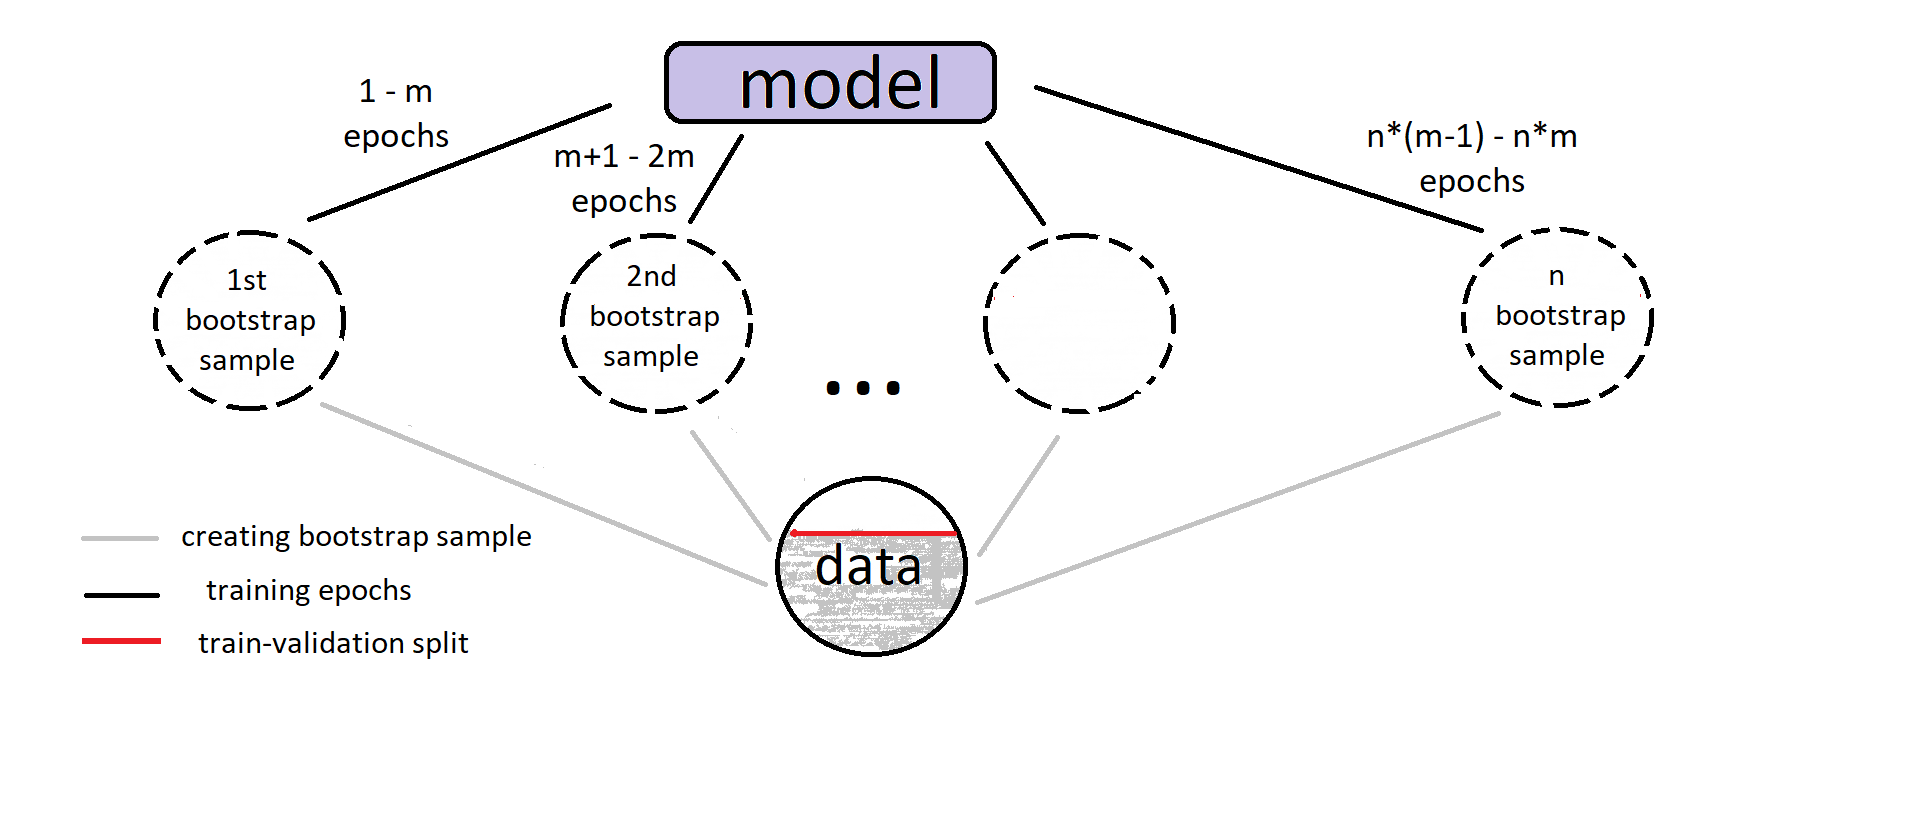

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_california_housing

Mounted at /content/drive


In [2]:
BOOTSTRAP_EPOCHS = 50
BOOTSTRAP_SAMPLES = 10
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 64
EPOCHS = 500
TEST_SIZE = 0.2
RS = 42

For regular training we will create a simple neural network and we will train it during 500 epochs.

For training with bootstrap samples we will create second model with the same architecture. 
We will create 10 bootstrap samples and train our second model sequentially on each of them for 50 epochs. So the final number of training epochs will be the same as for the first model - 500.

Before training for each model validation data will be separated from training data.

# Binary classification

## Experiment 1
### Mine or rock dataset

sourse:
https://www.kaggle.com/datasets/rupakroy/sonarcsv

In [3]:
data = pd.read_csv('/content/drive/MyDrive/datasets/sonar.csv')
X = data.drop(['R'], axis=1)
y = np.where(data.R == 'R', 0, 1)

x_train_valid, x_test, y_train_valid, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=VALIDATION_SPLIT, random_state=RS)

x_train = x_train.reset_index(drop=True)
x_valid = x_valid.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [4]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
3/3 [==============================] - 2s 195ms/step - loss: 0.6846 - accuracy: 0.5455 - val_loss: 0.6736 - val_accuracy: 0.6667
Epoch 2/500
3/3 [==============================] - 0s 32ms/step - loss: 0.6644 - accuracy: 0.6606 - val_loss: 0.6697 - val_accuracy: 0.5714
Epoch 3/500
3/3 [==============================] - 0s 30ms/step - loss: 0.6476 - accuracy: 0.6727 - val_loss: 0.6374 - val_accuracy: 0.6667
Epoch 4/500
3/3 [==============================] - 0s 30ms/step - loss: 0.6308 - accuracy: 0.6848 - val_loss: 0.6267 - val_accuracy: 0.7143
Epoch 5/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6141 - accuracy: 0.6970 - val_loss: 0.6364 - val_accuracy: 0.6667
Epoch 6/500
3/3 [==============================] - 0s 22ms/step - loss: 0.5978 - accuracy: 0.7152 - val_loss: 0.6398 - val_accuracy: 0.6190
Epoch 7/500
3/3 [==============================] - 0s 34ms/step - loss: 0.5821 - accuracy: 0.7455 - val_loss: 0.6223 - val_accuracy: 0.6429
Epoch 8/500
3/3 [==

In [5]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])


for i in range(BOOTSTRAP_SAMPLES):
        
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]
        
    history_2 = model_2.fit(train_data, train_target, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)



Epoch 1/50
3/3 [==============================] - 1s 164ms/step - loss: 0.6937 - accuracy: 0.4788 - val_loss: 0.6701 - val_accuracy: 0.6429
Epoch 2/50
3/3 [==============================] - 0s 34ms/step - loss: 0.6732 - accuracy: 0.5515 - val_loss: 0.6552 - val_accuracy: 0.6667
Epoch 3/50
3/3 [==============================] - 0s 33ms/step - loss: 0.6601 - accuracy: 0.5939 - val_loss: 0.6530 - val_accuracy: 0.7143
Epoch 4/50
3/3 [==============================] - 0s 31ms/step - loss: 0.6453 - accuracy: 0.6788 - val_loss: 0.6512 - val_accuracy: 0.7381
Epoch 5/50
3/3 [==============================] - 0s 24ms/step - loss: 0.6314 - accuracy: 0.7152 - val_loss: 0.6485 - val_accuracy: 0.6667
Epoch 6/50
3/3 [==============================] - 0s 25ms/step - loss: 0.6173 - accuracy: 0.7394 - val_loss: 0.6390 - val_accuracy: 0.6905
Epoch 7/50
3/3 [==============================] - 0s 33ms/step - loss: 0.6017 - accuracy: 0.7394 - val_loss: 0.6283 - val_accuracy: 0.7143
Epoch 8/50
3/3 [==========

<ipython-input-5-224f7e7e2156>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 29ms/step - loss: 0.1692 - accuracy: 0.9515 - val_loss: 0.7823 - val_accuracy: 0.7381
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.1499 - accuracy: 0.9394 - val_loss: 0.7847 - val_accuracy: 0.7619
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.1381 - accuracy: 0.9455 - val_loss: 0.7714 - val_accuracy: 0.7143
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.1271 - accuracy: 0.9697 - val_loss: 0.7461 - val_accuracy: 0.7381
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.1144 - accuracy: 0.9636 - val_loss: 0.7117 - val_accuracy: 0.7381
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.1085 - accuracy: 0.9818 - val_loss: 0.7397 - val_accuracy: 0.7143
Epoch 8/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0975 - accuracy: 0.9818 - val_loss: 0.7948 - val_accuracy: 0.7143
Epoch 9/50
3/3 [======================

<ipython-input-5-224f7e7e2156>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 18ms/step - loss: 0.0612 - accuracy: 0.9818 - val_loss: 0.9298 - val_accuracy: 0.7381
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0446 - accuracy: 0.9879 - val_loss: 0.9780 - val_accuracy: 0.7143
Epoch 4/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0494 - accuracy: 0.9879 - val_loss: 0.9206 - val_accuracy: 0.7381
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0339 - accuracy: 1.0000 - val_loss: 0.8565 - val_accuracy: 0.8095
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0442 - accuracy: 0.9939 - val_loss: 0.9232 - val_accuracy: 0.7857
Epoch 7/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.9703 - val_accuracy: 0.7381
Epoch 8/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 0.8807 - val_accuracy: 0.7857
Epoch 9/50
3/3 [======================

<ipython-input-5-224f7e7e2156>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 23ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 1.0406 - val_accuracy: 0.7857
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.0528 - val_accuracy: 0.7857
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.0795 - val_accuracy: 0.7619
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.0486 - val_accuracy: 0.7857
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.0553 - val_accuracy: 0.8095
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.0738 - val_accuracy: 0.7857
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.0975 - val_accuracy: 0.7857
Epoch 9/50
3/3 [======================

<ipython-input-5-224f7e7e2156>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 18ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 1.2888 - val_accuracy: 0.7619
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 1.3107 - val_accuracy: 0.7619
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.3172 - val_accuracy: 0.7619
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.3227 - val_accuracy: 0.7857
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.2984 - val_accuracy: 0.7857
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.2884 - val_accuracy: 0.7857
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.2862 - val_accuracy: 0.7857
Epoch 9/50
3/3 [======================

<ipython-input-5-224f7e7e2156>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.3190 - val_accuracy: 0.7857
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.3004 - val_accuracy: 0.7857
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.3172 - val_accuracy: 0.7619
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.3197 - val_accuracy: 0.7857
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.3127 - val_accuracy: 0.7619
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.3195 - val_accuracy: 0.7619
Epoch 8/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.3299 - val_accuracy: 0.7857
Epoch 9/50
3/3 [===========

<ipython-input-5-224f7e7e2156>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 17ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.4863 - val_accuracy: 0.7619
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.4665 - val_accuracy: 0.7619
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.4256 - val_accuracy: 0.7619
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.4138 - val_accuracy: 0.7857
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.4273 - val_accuracy: 0.7857
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.4441 - val_accuracy: 0.7857
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.4584 - val_accuracy: 0.7857
Epoch 9/50
3/3 [======================

<ipython-input-5-224f7e7e2156>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 77ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.4448 - val_accuracy: 0.7857
Epoch 2/50
3/3 [==============================] - 0s 34ms/step - loss: 8.1721e-04 - accuracy: 1.0000 - val_loss: 1.4300 - val_accuracy: 0.7857
Epoch 3/50
3/3 [==============================] - 0s 24ms/step - loss: 7.4904e-04 - accuracy: 1.0000 - val_loss: 1.4185 - val_accuracy: 0.7857
Epoch 4/50
3/3 [==============================] - 0s 36ms/step - loss: 6.6934e-04 - accuracy: 1.0000 - val_loss: 1.4142 - val_accuracy: 0.7857
Epoch 5/50
3/3 [==============================] - 0s 27ms/step - loss: 5.8873e-04 - accuracy: 1.0000 - val_loss: 1.4154 - val_accuracy: 0.7857
Epoch 6/50
3/3 [==============================] - 0s 25ms/step - loss: 5.5556e-04 - accuracy: 1.0000 - val_loss: 1.4204 - val_accuracy: 0.7857
Epoch 7/50
3/3 [==============================] - 0s 26ms/step - loss: 5.3507e-04 - accuracy: 1.0000 - val_loss: 1.4273 - val_accuracy: 0.7857
Epoch 8/50
3/3

<ipython-input-5-224f7e7e2156>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 19ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.6846 - val_accuracy: 0.6905
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.5447 - val_accuracy: 0.7619
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.4684 - val_accuracy: 0.7857
Epoch 5/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.4618 - val_accuracy: 0.7857
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.4861 - val_accuracy: 0.7857
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 9.1436e-04 - accuracy: 1.0000 - val_loss: 1.5168 - val_accuracy: 0.7857
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 9.3877e-04 - accuracy: 1.0000 - val_loss: 1.5326 - val_accuracy: 0.7857
Epoch 9/50
3/3 [==============

<ipython-input-5-224f7e7e2156>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 20ms/step - loss: 4.0801e-04 - accuracy: 1.0000 - val_loss: 1.5577 - val_accuracy: 0.7857
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 3.9907e-04 - accuracy: 1.0000 - val_loss: 1.5586 - val_accuracy: 0.7857
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 3.8140e-04 - accuracy: 1.0000 - val_loss: 1.5634 - val_accuracy: 0.7857
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 3.6302e-04 - accuracy: 1.0000 - val_loss: 1.5687 - val_accuracy: 0.7857
Epoch 6/50
3/3 [==============================] - 0s 21ms/step - loss: 3.5253e-04 - accuracy: 1.0000 - val_loss: 1.5756 - val_accuracy: 0.7857
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 3.4151e-04 - accuracy: 1.0000 - val_loss: 1.5802 - val_accuracy: 0.7857
Epoch 8/50
3/3 [==============================] - 0s 17ms/step - loss: 3.3770e-04 - accuracy: 1.0000 - val_loss: 1.5834 - val_accuracy: 0.7857
Epoch 9/50

<ipython-input-5-224f7e7e2156>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


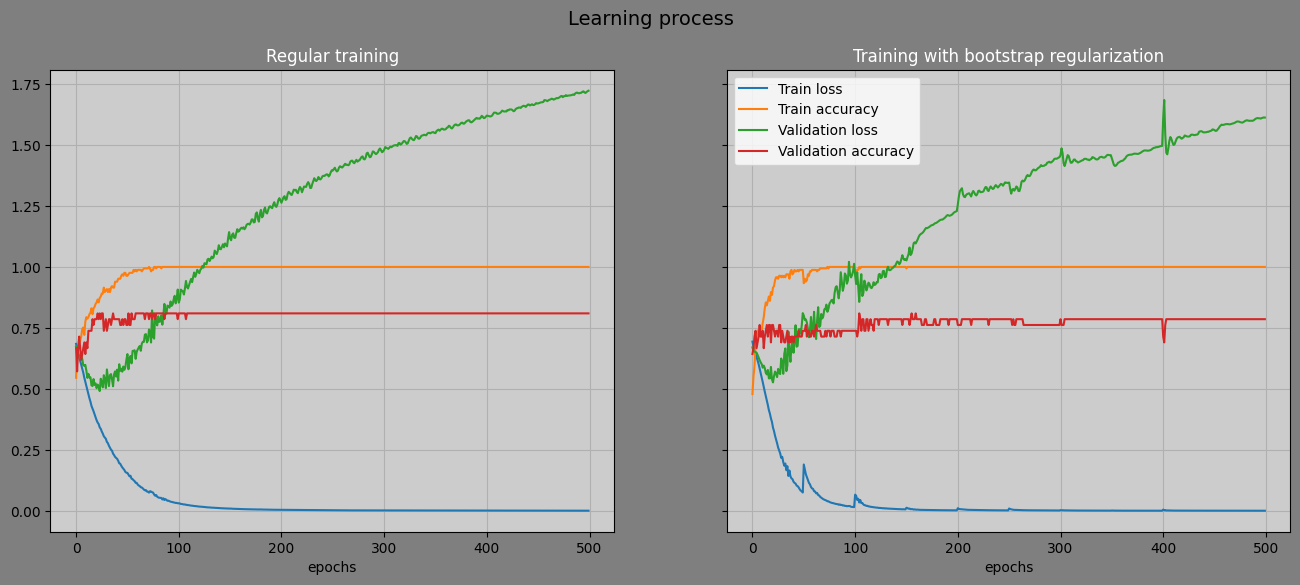

In [6]:

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()



In [7]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


2/2 [==============================] - 0s 6ms/step - loss: 0.2297 - accuracy: 0.9762


,Test accuracy,Test loss
,,
Regular training,0.976190,0.246038
Boostrap regularization,0.976190,0.229719


## Experiment 2
### Sklearn breast cancer dataset

In [8]:
data = load_breast_cancer()
X = data['data']
y = data['target']


x_train_valid, x_test, y_train_valid, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=VALIDATION_SPLIT, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [9]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=500)

Epoch 1/500
6/6 [==============================] - 2s 60ms/step - loss: 24.4973 - accuracy: 0.4451 - val_loss: 15.1522 - val_accuracy: 0.3956
Epoch 2/500
6/6 [==============================] - 0s 15ms/step - loss: 10.1368 - accuracy: 0.5440 - val_loss: 1.6077 - val_accuracy: 0.7363
Epoch 3/500
6/6 [==============================] - 0s 11ms/step - loss: 5.5020 - accuracy: 0.4753 - val_loss: 2.0630 - val_accuracy: 0.8242
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 3.6912 - accuracy: 0.7775 - val_loss: 2.4237 - val_accuracy: 0.5604
Epoch 5/500
6/6 [==============================] - 0s 11ms/step - loss: 2.5428 - accuracy: 0.6429 - val_loss: 3.2711 - val_accuracy: 0.8022
Epoch 6/500
6/6 [==============================] - 0s 11ms/step - loss: 1.8637 - accuracy: 0.8626 - val_loss: 1.5493 - val_accuracy: 0.7253
Epoch 7/500
6/6 [==============================] - 0s 12ms/step - loss: 1.2525 - accuracy: 0.8187 - val_loss: 2.1929 - val_accuracy: 0.8462
Epoch 8/500
6/6 [=

In [10]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 1/50
6/6 [==============================] - 1s 54ms/step - loss: 11.6255 - accuracy: 0.5742 - val_loss: 15.3906 - val_accuracy: 0.6154
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 7.0724 - accuracy: 0.5357 - val_loss: 1.4201 - val_accuracy: 0.7253
Epoch 3/50
6/6 [==============================] - 0s 14ms/step - loss: 3.7184 - accuracy: 0.7967 - val_loss: 2.6845 - val_accuracy: 0.8352
Epoch 4/50
6/6 [==============================] - 0s 16ms/step - loss: 1.6593 - accuracy: 0.7473 - val_loss: 1.3282 - val_accuracy: 0.8571
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 1.4395 - accuracy: 0.8874 - val_loss: 1.3516 - val_accuracy: 0.8681
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 0.9151 - accuracy: 0.8462 - val_loss: 1.3310 - val_accuracy: 0.8681
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.9523 - accuracy: 0.9066 - val_loss: 1.0791 - val_accuracy: 0.8791
Epoch 8/50
6/6 [=========

<ipython-input-10-5029d4116aea>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 12ms/step - loss: 0.4302 - accuracy: 0.9093 - val_loss: 0.5813 - val_accuracy: 0.8901
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.3735 - accuracy: 0.9231 - val_loss: 1.0546 - val_accuracy: 0.8681
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 0.4157 - accuracy: 0.9203 - val_loss: 0.5899 - val_accuracy: 0.8901
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.3758 - accuracy: 0.9368 - val_loss: 0.6104 - val_accuracy: 0.8681
Epoch 6/50
6/6 [==============================] - 0s 11ms/step - loss: 0.3714 - accuracy: 0.9203 - val_loss: 0.5127 - val_accuracy: 0.8901
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 0.2659 - accuracy: 0.9451 - val_loss: 0.4895 - val_accuracy: 0.8791
Epoch 8/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2360 - accuracy: 0.9396 - val_loss: 0.5449 - val_accuracy: 0.8901
Epoch 9/50
6/6 [=======================

<ipython-input-10-5029d4116aea>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 14ms/step - loss: 0.3057 - accuracy: 0.9313 - val_loss: 0.4557 - val_accuracy: 0.8791
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2734 - accuracy: 0.9423 - val_loss: 0.3839 - val_accuracy: 0.8681
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 0.3036 - accuracy: 0.9203 - val_loss: 0.4148 - val_accuracy: 0.8681
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2804 - accuracy: 0.9231 - val_loss: 0.5697 - val_accuracy: 0.8791
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.2549 - accuracy: 0.9396 - val_loss: 0.3322 - val_accuracy: 0.8901
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2254 - accuracy: 0.9313 - val_loss: 0.3427 - val_accuracy: 0.8791
Epoch 8/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2622 - accuracy: 0.9341 - val_loss: 0.3114 - val_accuracy: 0.8901
Epoch 9/50
6/6 [==========================

<ipython-input-10-5029d4116aea>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 29ms/step - loss: 0.5062 - accuracy: 0.9011 - val_loss: 0.7099 - val_accuracy: 0.8352
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 0.3871 - accuracy: 0.9286 - val_loss: 0.5831 - val_accuracy: 0.9011
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2808 - accuracy: 0.9396 - val_loss: 1.1506 - val_accuracy: 0.8571
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2235 - accuracy: 0.9560 - val_loss: 0.5436 - val_accuracy: 0.8571
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.2682 - accuracy: 0.9505 - val_loss: 0.4098 - val_accuracy: 0.8901
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2646 - accuracy: 0.9423 - val_loss: 0.6953 - val_accuracy: 0.8901
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1845 - accuracy: 0.9478 - val_loss: 0.4741 - val_accuracy: 0.8901
Epoch 8/50
6/6 [=======================

<ipython-input-10-5029d4116aea>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 9ms/step - loss: 0.2470 - accuracy: 0.9258 - val_loss: 0.3413 - val_accuracy: 0.9011
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2290 - accuracy: 0.9313 - val_loss: 0.3144 - val_accuracy: 0.9011
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 0.6662 - accuracy: 0.8544 - val_loss: 0.5247 - val_accuracy: 0.8791
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 0.8338 - accuracy: 0.8681 - val_loss: 0.6421 - val_accuracy: 0.8901
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 0.4987 - accuracy: 0.9093 - val_loss: 1.6236 - val_accuracy: 0.8242
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.5190 - accuracy: 0.8984 - val_loss: 0.4344 - val_accuracy: 0.9011
Epoch 8/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2561 - accuracy: 0.9368 - val_loss: 0.4381 - val_accuracy: 0.8791
Epoch 9/50
6/6 [============================

<ipython-input-10-5029d4116aea>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 24ms/step - loss: 0.2488 - accuracy: 0.9286 - val_loss: 0.1834 - val_accuracy: 0.9341
Epoch 2/50
6/6 [==============================] - 0s 13ms/step - loss: 0.2470 - accuracy: 0.9258 - val_loss: 0.4533 - val_accuracy: 0.8791
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 0.3799 - accuracy: 0.9011 - val_loss: 0.2304 - val_accuracy: 0.9231
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.2218 - accuracy: 0.9066 - val_loss: 0.1779 - val_accuracy: 0.9341
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1999 - accuracy: 0.9258 - val_loss: 0.1804 - val_accuracy: 0.9121
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 0.2000 - accuracy: 0.9066 - val_loss: 0.2121 - val_accuracy: 0.9121
Epoch 7/50
6/6 [==============================] - 0s 16ms/step - loss: 0.2286 - accuracy: 0.9231 - val_loss: 0.7524 - val_accuracy: 0.7912
Epoch 8/50
6/6 [======================

<ipython-input-10-5029d4116aea>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 12ms/step - loss: 0.3262 - accuracy: 0.8929 - val_loss: 0.3162 - val_accuracy: 0.9011
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2405 - accuracy: 0.9176 - val_loss: 0.1662 - val_accuracy: 0.9341
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1344 - accuracy: 0.9423 - val_loss: 0.1591 - val_accuracy: 0.9341
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.2238 - accuracy: 0.9258 - val_loss: 0.2008 - val_accuracy: 0.9231
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.3403 - accuracy: 0.8874 - val_loss: 0.2600 - val_accuracy: 0.9121
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.2988 - accuracy: 0.9148 - val_loss: 0.1659 - val_accuracy: 0.9341
Epoch 8/50
6/6 [==============================] - 0s 12ms/step - loss: 0.3507 - accuracy: 0.8929 - val_loss: 0.4162 - val_accuracy: 0.8571
Epoch 9/50
6/6 [========================

<ipython-input-10-5029d4116aea>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 9ms/step - loss: 0.4017 - accuracy: 0.9148 - val_loss: 0.2564 - val_accuracy: 0.9231
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.1257 - accuracy: 0.9505 - val_loss: 0.3875 - val_accuracy: 0.9121
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.2136 - accuracy: 0.9451 - val_loss: 0.2737 - val_accuracy: 0.9231
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1235 - accuracy: 0.9560 - val_loss: 0.2145 - val_accuracy: 0.9341
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1268 - accuracy: 0.9560 - val_loss: 0.3366 - val_accuracy: 0.9121
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2087 - accuracy: 0.9423 - val_loss: 0.2410 - val_accuracy: 0.9231
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1413 - accuracy: 0.9451 - val_loss: 0.2315 - val_accuracy: 0.9121
Epoch 9/50
6/6 [=========================

<ipython-input-10-5029d4116aea>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 13ms/step - loss: 0.1506 - accuracy: 0.9451 - val_loss: 0.2531 - val_accuracy: 0.9341
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.1558 - accuracy: 0.9505 - val_loss: 0.2146 - val_accuracy: 0.9451
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.2261 - accuracy: 0.9231 - val_loss: 0.1546 - val_accuracy: 0.9341
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2416 - accuracy: 0.9286 - val_loss: 0.2265 - val_accuracy: 0.9121
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1820 - accuracy: 0.9451 - val_loss: 0.4009 - val_accuracy: 0.8901
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2224 - accuracy: 0.9341 - val_loss: 0.2024 - val_accuracy: 0.9341
Epoch 8/50
6/6 [==============================] - 0s 12ms/step - loss: 0.3273 - accuracy: 0.9093 - val_loss: 0.3750 - val_accuracy: 0.9121
Epoch 9/50
6/6 [========================

<ipython-input-10-5029d4116aea>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 23ms/step - loss: 0.0748 - accuracy: 0.9698 - val_loss: 0.1794 - val_accuracy: 0.9341
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0547 - accuracy: 0.9780 - val_loss: 0.1759 - val_accuracy: 0.9451
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0550 - accuracy: 0.9863 - val_loss: 0.1755 - val_accuracy: 0.9341
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0535 - accuracy: 0.9863 - val_loss: 0.2257 - val_accuracy: 0.9341
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.1009 - accuracy: 0.9615 - val_loss: 0.1741 - val_accuracy: 0.9341
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0870 - accuracy: 0.9698 - val_loss: 0.2309 - val_accuracy: 0.9231
Epoch 7/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0740 - accuracy: 0.9753 - val_loss: 0.1713 - val_accuracy: 0.9560
Epoch 8/50
6/6 [======================

<ipython-input-10-5029d4116aea>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


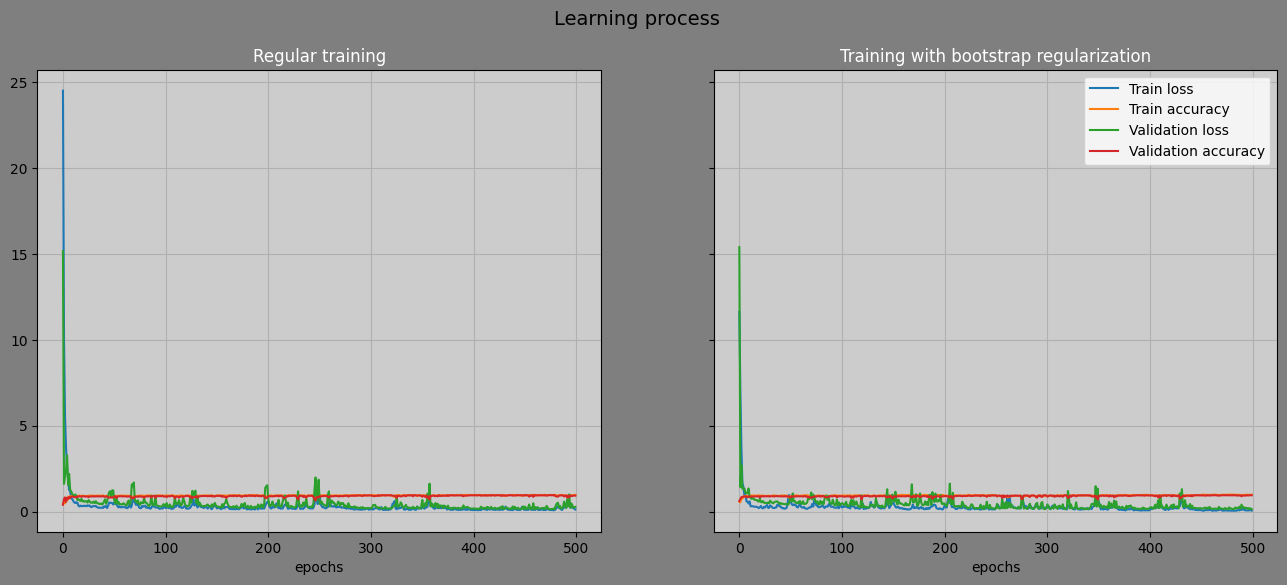

In [11]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()


In [12]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


4/4 [==============================] - 0s 3ms/step - loss: 0.1145 - accuracy: 0.9474


,Test accuracy,Test loss
,,
Regular training,0.938596,0.235746
Boostrap regularization,0.947368,0.114454


# Multi-class classification

## Experiment 3
### Sklearn wine dataset

In [13]:
data = load_wine()
X = data['data']
y = data['target']
y = to_categorical(y)

x_train_valid, x_test, y_train_valid, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=VALIDATION_SPLIT, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [14]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
2/2 [==============================] - 1s 234ms/step - loss: 29.8144 - accuracy: 0.3628 - val_loss: 49.4065 - val_accuracy: 0.2759
Epoch 2/500
2/2 [==============================] - 0s 33ms/step - loss: 35.7781 - accuracy: 0.2655 - val_loss: 2.2988 - val_accuracy: 0.6207
Epoch 3/500
2/2 [==============================] - 0s 35ms/step - loss: 4.2601 - accuracy: 0.5221 - val_loss: 14.2238 - val_accuracy: 0.2759
Epoch 4/500
2/2 [==============================] - 0s 34ms/step - loss: 11.2503 - accuracy: 0.5398 - val_loss: 9.5903 - val_accuracy: 0.6552
Epoch 5/500
2/2 [==============================] - 0s 34ms/step - loss: 9.4388 - accuracy: 0.5310 - val_loss: 7.1534 - val_accuracy: 0.3793
Epoch 6/500
2/2 [==============================] - 0s 34ms/step - loss: 4.8073 - accuracy: 0.6460 - val_loss: 0.7572 - val_accuracy: 0.6552
Epoch 7/500
2/2 [==============================] - 0s 33ms/step - loss: 3.5925 - accuracy: 0.3982 - val_loss: 3.1942 - val_accuracy: 0.2759
Epoch 8/500
2/

In [15]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 1/50
2/2 [==============================] - 1s 203ms/step - loss: 43.0684 - accuracy: 0.3628 - val_loss: 23.3864 - val_accuracy: 0.4483
Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 31.8226 - accuracy: 0.2478 - val_loss: 9.4350 - val_accuracy: 0.4828
Epoch 3/50
2/2 [==============================] - 0s 37ms/step - loss: 15.1170 - accuracy: 0.3805 - val_loss: 36.6189 - val_accuracy: 0.2759
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 22.2709 - accuracy: 0.4602 - val_loss: 31.5262 - val_accuracy: 0.2759
Epoch 5/50
2/2 [==============================] - 0s 37ms/step - loss: 22.6593 - accuracy: 0.2920 - val_loss: 10.1805 - val_accuracy: 0.2759
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 7.4227 - accuracy: 0.2743 - val_loss: 6.0807 - val_accuracy: 0.4828
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 9.2555 - accuracy: 0.3540 - val_loss: 10.4232 - val_accuracy: 0.2759
Epoch 8/50
2/2 [

<ipython-input-15-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 36ms/step - loss: 0.5675 - accuracy: 0.6903 - val_loss: 0.6913 - val_accuracy: 0.7586
Epoch 3/50
2/2 [==============================] - 0s 55ms/step - loss: 0.5204 - accuracy: 0.7345 - val_loss: 0.5841 - val_accuracy: 0.7931
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5505 - accuracy: 0.7611 - val_loss: 0.5724 - val_accuracy: 0.7931
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 0.5370 - accuracy: 0.7522 - val_loss: 0.7327 - val_accuracy: 0.7586
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.5396 - accuracy: 0.7611 - val_loss: 0.6404 - val_accuracy: 0.7931
Epoch 7/50
2/2 [==============================] - 0s 53ms/step - loss: 0.5159 - accuracy: 0.7345 - val_loss: 0.5463 - val_accuracy: 0.8276
Epoch 8/50
2/2 [==============================] - 0s 37ms/step - loss: 0.5649 - accuracy: 0.7434 - val_loss: 0.6944 - val_accuracy: 0.6207
Epoch 9/50
2/2 [======================

<ipython-input-15-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 35ms/step - loss: 0.3372 - accuracy: 0.9381 - val_loss: 0.5204 - val_accuracy: 0.8276
Epoch 3/50
2/2 [==============================] - 0s 54ms/step - loss: 0.3354 - accuracy: 0.9469 - val_loss: 0.5059 - val_accuracy: 0.7931
Epoch 4/50
2/2 [==============================] - 0s 41ms/step - loss: 0.3547 - accuracy: 0.8407 - val_loss: 0.6971 - val_accuracy: 0.6897
Epoch 5/50
2/2 [==============================] - 0s 38ms/step - loss: 0.3588 - accuracy: 0.8407 - val_loss: 0.4715 - val_accuracy: 0.8276
Epoch 6/50
2/2 [==============================] - 0s 53ms/step - loss: 0.3069 - accuracy: 0.9292 - val_loss: 0.5543 - val_accuracy: 0.7586
Epoch 7/50
2/2 [==============================] - 0s 33ms/step - loss: 0.3011 - accuracy: 0.9381 - val_loss: 0.6040 - val_accuracy: 0.7586
Epoch 8/50
2/2 [==============================] - 0s 33ms/step - loss: 0.2969 - accuracy: 0.9558 - val_loss: 0.5990 - val_accuracy: 0.7586
Epoch 9/50
2/2 [======================

<ipython-input-15-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 109ms/step - loss: 0.2393 - accuracy: 0.9558 - val_loss: 0.3219 - val_accuracy: 0.8966
Epoch 2/50
2/2 [==============================] - 0s 52ms/step - loss: 0.3059 - accuracy: 0.9027 - val_loss: 0.4865 - val_accuracy: 0.8621
Epoch 3/50
2/2 [==============================] - 0s 63ms/step - loss: 0.2310 - accuracy: 0.9646 - val_loss: 0.4020 - val_accuracy: 0.7931
Epoch 4/50
2/2 [==============================] - 0s 76ms/step - loss: 0.2280 - accuracy: 0.9381 - val_loss: 0.3433 - val_accuracy: 0.8966
Epoch 5/50
2/2 [==============================] - 0s 53ms/step - loss: 0.2199 - accuracy: 0.9646 - val_loss: 0.4045 - val_accuracy: 0.8621
Epoch 6/50
2/2 [==============================] - 0s 69ms/step - loss: 0.2143 - accuracy: 0.9558 - val_loss: 0.3615 - val_accuracy: 0.8966
Epoch 7/50
2/2 [==============================] - 0s 54ms/step - loss: 0.2123 - accuracy: 0.9558 - val_loss: 0.3640 - val_accuracy: 0.8276
Epoch 8/50
2/2 [=====================

<ipython-input-15-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 58ms/step - loss: 0.3428 - accuracy: 0.8761 - val_loss: 0.2361 - val_accuracy: 0.8966
Epoch 3/50
2/2 [==============================] - 0s 38ms/step - loss: 0.2494 - accuracy: 0.8938 - val_loss: 0.2500 - val_accuracy: 0.8966
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.2012 - accuracy: 0.9292 - val_loss: 0.3227 - val_accuracy: 0.9310
Epoch 5/50
2/2 [==============================] - 0s 37ms/step - loss: 0.2019 - accuracy: 0.9115 - val_loss: 0.2191 - val_accuracy: 0.8966
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.2074 - accuracy: 0.9204 - val_loss: 0.3678 - val_accuracy: 0.8621
Epoch 7/50
2/2 [==============================] - 0s 36ms/step - loss: 0.2134 - accuracy: 0.9292 - val_loss: 0.2130 - val_accuracy: 0.9310
Epoch 8/50
2/2 [==============================] - 0s 34ms/step - loss: 0.2345 - accuracy: 0.9115 - val_loss: 0.3036 - val_accuracy: 0.9310
Epoch 9/50
2/2 [======================

<ipython-input-15-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 40ms/step - loss: 0.1817 - accuracy: 0.9381 - val_loss: 0.3452 - val_accuracy: 0.8966
Epoch 3/50
2/2 [==============================] - 0s 37ms/step - loss: 0.1347 - accuracy: 0.9735 - val_loss: 0.3461 - val_accuracy: 0.8966
Epoch 4/50
2/2 [==============================] - 0s 53ms/step - loss: 0.2499 - accuracy: 0.9027 - val_loss: 0.5251 - val_accuracy: 0.7931
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 0.2106 - accuracy: 0.8761 - val_loss: 0.4032 - val_accuracy: 0.8966
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.1533 - accuracy: 0.9558 - val_loss: 0.7665 - val_accuracy: 0.7586
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.2769 - accuracy: 0.8850 - val_loss: 0.4509 - val_accuracy: 0.8966
Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 0.2322 - accuracy: 0.8938 - val_loss: 0.6688 - val_accuracy: 0.7586
Epoch 9/50
2/2 [======================

<ipython-input-15-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 37ms/step - loss: 0.3296 - accuracy: 0.8584 - val_loss: 0.4463 - val_accuracy: 0.8966
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 0.3792 - accuracy: 0.9027 - val_loss: 0.2718 - val_accuracy: 0.8966
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.3197 - accuracy: 0.8850 - val_loss: 0.2868 - val_accuracy: 0.8966
Epoch 5/50
2/2 [==============================] - 0s 34ms/step - loss: 0.4111 - accuracy: 0.8496 - val_loss: 0.2522 - val_accuracy: 0.8966
Epoch 6/50
2/2 [==============================] - 0s 37ms/step - loss: 0.2846 - accuracy: 0.8761 - val_loss: 0.2214 - val_accuracy: 0.9310
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.2587 - accuracy: 0.9204 - val_loss: 0.3430 - val_accuracy: 0.9310
Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 0.2431 - accuracy: 0.8761 - val_loss: 0.2197 - val_accuracy: 0.9310
Epoch 9/50
2/2 [======================

<ipython-input-15-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 130ms/step - loss: 0.2341 - accuracy: 0.8938 - val_loss: 0.1984 - val_accuracy: 0.9310
Epoch 2/50
2/2 [==============================] - 0s 62ms/step - loss: 0.2460 - accuracy: 0.9115 - val_loss: 0.2507 - val_accuracy: 0.8966
Epoch 3/50
2/2 [==============================] - 0s 81ms/step - loss: 0.2229 - accuracy: 0.9381 - val_loss: 0.2656 - val_accuracy: 0.8966
Epoch 4/50
2/2 [==============================] - 0s 89ms/step - loss: 0.2209 - accuracy: 0.9292 - val_loss: 0.2015 - val_accuracy: 0.9310
Epoch 5/50
2/2 [==============================] - 0s 53ms/step - loss: 0.2141 - accuracy: 0.9115 - val_loss: 0.2217 - val_accuracy: 0.8966
Epoch 6/50
2/2 [==============================] - 0s 38ms/step - loss: 0.2145 - accuracy: 0.9381 - val_loss: 0.2429 - val_accuracy: 0.9310
Epoch 7/50
2/2 [==============================] - 0s 37ms/step - loss: 0.2069 - accuracy: 0.9469 - val_loss: 0.1920 - val_accuracy: 0.9310
Epoch 8/50
2/2 [=====================

<ipython-input-15-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 37ms/step - loss: 0.0964 - accuracy: 0.9735 - val_loss: 0.3282 - val_accuracy: 0.8621
Epoch 3/50
2/2 [==============================] - 0s 53ms/step - loss: 0.1074 - accuracy: 0.9558 - val_loss: 0.2391 - val_accuracy: 0.8966
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0840 - accuracy: 0.9912 - val_loss: 0.1841 - val_accuracy: 0.9310
Epoch 5/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0918 - accuracy: 0.9823 - val_loss: 0.2115 - val_accuracy: 0.9310
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0763 - accuracy: 1.0000 - val_loss: 0.2994 - val_accuracy: 0.9310
Epoch 7/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0794 - accuracy: 0.9823 - val_loss: 0.2863 - val_accuracy: 0.8966
Epoch 8/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0729 - accuracy: 0.9912 - val_loss: 0.2272 - val_accuracy: 0.8966
Epoch 9/50
2/2 [======================

<ipython-input-15-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 38ms/step - loss: 0.1919 - accuracy: 0.9558 - val_loss: 0.2454 - val_accuracy: 0.9310
Epoch 3/50
2/2 [==============================] - 0s 66ms/step - loss: 0.1818 - accuracy: 0.9558 - val_loss: 0.2375 - val_accuracy: 0.9310
Epoch 4/50
2/2 [==============================] - 0s 72ms/step - loss: 0.2044 - accuracy: 0.9558 - val_loss: 0.2623 - val_accuracy: 0.8966
Epoch 5/50
2/2 [==============================] - 0s 62ms/step - loss: 0.2137 - accuracy: 0.9558 - val_loss: 0.2497 - val_accuracy: 0.8966
Epoch 6/50
2/2 [==============================] - 0s 69ms/step - loss: 0.1872 - accuracy: 0.9558 - val_loss: 0.2845 - val_accuracy: 0.8966
Epoch 7/50
2/2 [==============================] - 0s 55ms/step - loss: 0.1939 - accuracy: 0.9646 - val_loss: 0.2414 - val_accuracy: 0.8966
Epoch 8/50
2/2 [==============================] - 0s 60ms/step - loss: 0.1880 - accuracy: 0.9469 - val_loss: 0.2283 - val_accuracy: 0.9310
Epoch 9/50
2/2 [======================

<ipython-input-15-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


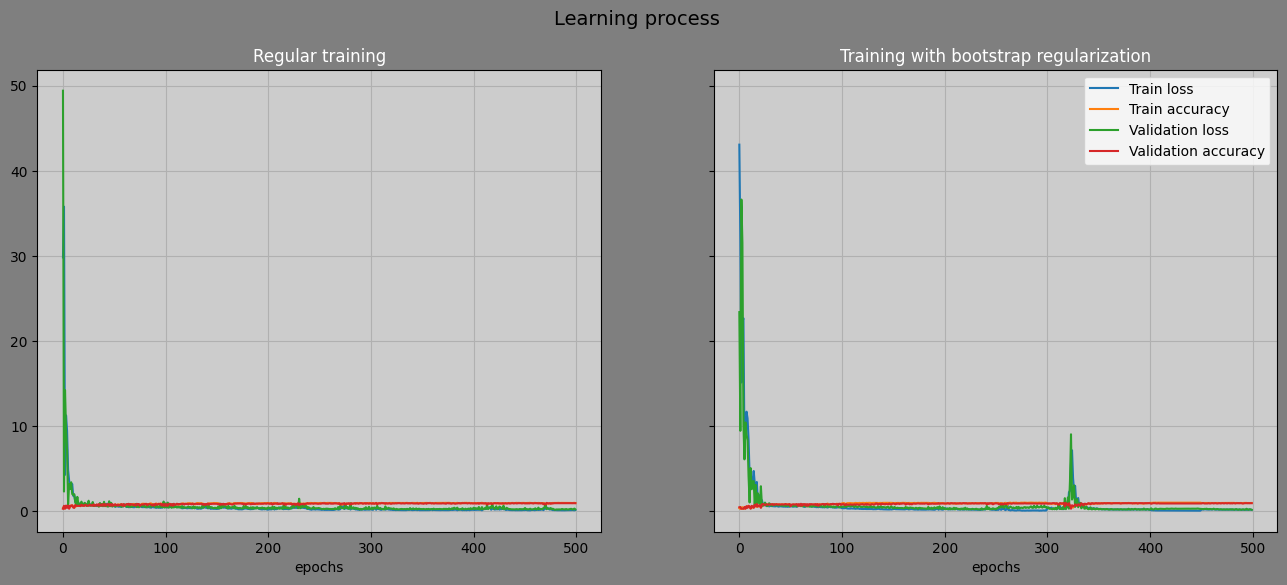

In [16]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()

In [17]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


2/2 [==============================] - 0s 7ms/step - loss: 0.2216 - accuracy: 0.9444


,Test accuracy,Test loss
,,
Regular training,0.916667,0.573113
Boostrap regularization,0.944444,0.221648


## Experiment 4
### Sklearn iris dataset

In [18]:
data = load_iris()
X = data['data']
y = data['target']
y = to_categorical(y)

x_train_valid, x_test, y_train_valid, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=VALIDATION_SPLIT, random_state=RS)

x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [19]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
2/2 [==============================] - 1s 216ms/step - loss: 1.0057 - accuracy: 0.4167 - val_loss: 0.8795 - val_accuracy: 0.6667
Epoch 2/500
2/2 [==============================] - 0s 34ms/step - loss: 0.8797 - accuracy: 0.5938 - val_loss: 0.7552 - val_accuracy: 0.7500
Epoch 3/500
2/2 [==============================] - 0s 36ms/step - loss: 0.7312 - accuracy: 0.7500 - val_loss: 0.7111 - val_accuracy: 0.6250
Epoch 4/500
2/2 [==============================] - 0s 34ms/step - loss: 0.6509 - accuracy: 0.6771 - val_loss: 0.6214 - val_accuracy: 0.6250
Epoch 5/500
2/2 [==============================] - 0s 40ms/step - loss: 0.5586 - accuracy: 0.6771 - val_loss: 0.5166 - val_accuracy: 0.6667
Epoch 6/500
2/2 [==============================] - 0s 33ms/step - loss: 0.4727 - accuracy: 0.8021 - val_loss: 0.4570 - val_accuracy: 0.9167
Epoch 7/500
2/2 [==============================] - 0s 33ms/step - loss: 0.4312 - accuracy: 0.9271 - val_loss: 0.4118 - val_accuracy: 0.9583
Epoch 8/500
2/2 [==

In [20]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 1/50
2/2 [==============================] - 1s 205ms/step - loss: 1.0384 - accuracy: 0.5417 - val_loss: 0.9585 - val_accuracy: 0.6250
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 0.8644 - accuracy: 0.6771 - val_loss: 0.7580 - val_accuracy: 0.6250
Epoch 3/50
2/2 [==============================] - 0s 45ms/step - loss: 0.7419 - accuracy: 0.6771 - val_loss: 0.6624 - val_accuracy: 0.9167
Epoch 4/50
2/2 [==============================] - 0s 50ms/step - loss: 0.6343 - accuracy: 0.8854 - val_loss: 0.6247 - val_accuracy: 0.6250
Epoch 5/50
2/2 [==============================] - 0s 34ms/step - loss: 0.5694 - accuracy: 0.6875 - val_loss: 0.5562 - val_accuracy: 0.6250
Epoch 6/50
2/2 [==============================] - 0s 33ms/step - loss: 0.4919 - accuracy: 0.6979 - val_loss: 0.4545 - val_accuracy: 0.9167
Epoch 7/50
2/2 [==============================] - 0s 33ms/step - loss: 0.4430 - accuracy: 0.9583 - val_loss: 0.3940 - val_accuracy: 0.9167
Epoch 8/50
2/2 [==========

<ipython-input-20-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 105ms/step - loss: 0.0580 - accuracy: 0.9792 - val_loss: 0.3086 - val_accuracy: 0.9167
Epoch 2/50
2/2 [==============================] - 0s 51ms/step - loss: 0.0593 - accuracy: 0.9896 - val_loss: 0.3384 - val_accuracy: 0.9167
Epoch 3/50
2/2 [==============================] - 0s 46ms/step - loss: 0.0654 - accuracy: 0.9792 - val_loss: 0.2317 - val_accuracy: 0.9583
Epoch 4/50
2/2 [==============================] - 0s 74ms/step - loss: 0.0497 - accuracy: 0.9896 - val_loss: 0.1859 - val_accuracy: 0.9583
Epoch 5/50
2/2 [==============================] - 0s 49ms/step - loss: 0.0576 - accuracy: 0.9688 - val_loss: 0.2693 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 70ms/step - loss: 0.0404 - accuracy: 0.9896 - val_loss: 0.2914 - val_accuracy: 0.9167
Epoch 7/50
2/2 [==============================] - 0s 45ms/step - loss: 0.0428 - accuracy: 0.9896 - val_loss: 0.2350 - val_accuracy: 0.9583
Epoch 8/50
2/2 [=====================

<ipython-input-20-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 115ms/step - loss: 0.0711 - accuracy: 0.9792 - val_loss: 0.2573 - val_accuracy: 0.9583
Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0410 - accuracy: 0.9896 - val_loss: 0.2992 - val_accuracy: 0.9583
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0574 - accuracy: 0.9688 - val_loss: 0.2165 - val_accuracy: 0.9583
Epoch 4/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0808 - accuracy: 0.9688 - val_loss: 0.2900 - val_accuracy: 0.9583
Epoch 5/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0421 - accuracy: 0.9688 - val_loss: 0.3022 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0408 - accuracy: 0.9792 - val_loss: 0.2485 - val_accuracy: 0.9583
Epoch 7/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0482 - accuracy: 0.9896 - val_loss: 0.2817 - val_accuracy: 0.9583
Epoch 8/50
2/2 [=====================

<ipython-input-20-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 39ms/step - loss: 0.0258 - accuracy: 0.9792 - val_loss: 0.2869 - val_accuracy: 0.9583
Epoch 3/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.2803 - val_accuracy: 0.9583
Epoch 4/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 0.2859 - val_accuracy: 0.9583
Epoch 5/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.2990 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 55ms/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.3166 - val_accuracy: 0.9583
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0242 - accuracy: 0.9792 - val_loss: 0.3143 - val_accuracy: 0.9583
Epoch 8/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0195 - accuracy: 0.9896 - val_loss: 0.2907 - val_accuracy: 0.9583
Epoch 9/50
2/2 [======================

<ipython-input-20-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 35ms/step - loss: 0.1697 - accuracy: 0.9167 - val_loss: 0.4538 - val_accuracy: 0.9583
Epoch 3/50
2/2 [==============================] - 0s 33ms/step - loss: 0.1184 - accuracy: 0.9583 - val_loss: 0.5365 - val_accuracy: 0.9167
Epoch 4/50
2/2 [==============================] - 0s 34ms/step - loss: 0.1742 - accuracy: 0.9688 - val_loss: 0.3411 - val_accuracy: 0.9583
Epoch 5/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.2092 - val_accuracy: 0.9167
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.3871 - accuracy: 0.8958 - val_loss: 0.3934 - val_accuracy: 0.9583
Epoch 7/50
2/2 [==============================] - 0s 33ms/step - loss: 0.1120 - accuracy: 0.9583 - val_loss: 0.4014 - val_accuracy: 0.9583
Epoch 8/50
2/2 [==============================] - 0s 31ms/step - loss: 0.0981 - accuracy: 0.9792 - val_loss: 0.2578 - val_accuracy: 0.9583
Epoch 9/50
2/2 [======================

<ipython-input-20-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 53ms/step - loss: 0.0133 - accuracy: 0.9896 - val_loss: 0.3306 - val_accuracy: 0.9583
Epoch 4/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0123 - accuracy: 0.9896 - val_loss: 0.3245 - val_accuracy: 0.9583
Epoch 5/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.3116 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.3271 - val_accuracy: 0.9583
Epoch 7/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0165 - accuracy: 0.9896 - val_loss: 0.3539 - val_accuracy: 0.9583
Epoch 8/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0155 - accuracy: 0.9896 - val_loss: 0.3448 - val_accuracy: 0.9583
Epoch 9/50
2/2 [==============================] - 0s 40ms/step - loss: 0.0139 - accuracy: 0.9896 - val_loss: 0.3200 - val_accuracy: 0.9583
Epoch 10/50
2/2 [=====================

<ipython-input-20-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 121ms/step - loss: 0.0234 - accuracy: 0.9896 - val_loss: 0.3390 - val_accuracy: 0.9583
Epoch 2/50
2/2 [==============================] - 0s 64ms/step - loss: 0.0220 - accuracy: 0.9896 - val_loss: 0.3115 - val_accuracy: 0.9583
Epoch 3/50
2/2 [==============================] - 0s 45ms/step - loss: 0.0386 - accuracy: 0.9896 - val_loss: 0.3847 - val_accuracy: 0.9583
Epoch 4/50
2/2 [==============================] - 0s 44ms/step - loss: 0.0251 - accuracy: 0.9896 - val_loss: 0.4970 - val_accuracy: 0.9167
Epoch 5/50
2/2 [==============================] - 0s 64ms/step - loss: 0.1733 - accuracy: 0.9583 - val_loss: 0.4356 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 66ms/step - loss: 0.0626 - accuracy: 0.9792 - val_loss: 0.2668 - val_accuracy: 0.9583
Epoch 7/50
2/2 [==============================] - 0s 52ms/step - loss: 0.0692 - accuracy: 0.9479 - val_loss: 0.2556 - val_accuracy: 0.9583
Epoch 8/50
2/2 [=====================

<ipython-input-20-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 33ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.3571 - val_accuracy: 0.9583
Epoch 4/50
2/2 [==============================] - 0s 54ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.3684 - val_accuracy: 0.9583
Epoch 5/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.3634 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.3475 - val_accuracy: 0.9583
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.3393 - val_accuracy: 0.9583
Epoch 8/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.3734 - val_accuracy: 0.9583
Epoch 9/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.3793 - val_accuracy: 0.9583
Epoch 10/50
2/2 [=====================

<ipython-input-20-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 40ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3876 - val_accuracy: 0.9583
Epoch 3/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4015 - val_accuracy: 0.9583
Epoch 4/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4094 - val_accuracy: 0.9583
Epoch 5/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4085 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4068 - val_accuracy: 0.9583
Epoch 7/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4070 - val_accuracy: 0.9583
Epoch 8/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4102 - val_accuracy: 0.9583
Epoch 9/50
2/2 [======================

<ipython-input-20-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 105ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.4341 - val_accuracy: 0.9583
Epoch 2/50
2/2 [==============================] - 0s 68ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4198 - val_accuracy: 0.9583
Epoch 3/50
2/2 [==============================] - 0s 76ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.4191 - val_accuracy: 0.9583
Epoch 4/50
2/2 [==============================] - 0s 62ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4277 - val_accuracy: 0.9583
Epoch 5/50
2/2 [==============================] - 0s 52ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4373 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 65ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4414 - val_accuracy: 0.9583
Epoch 7/50
2/2 [==============================] - 0s 60ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4390 - val_accuracy: 0.9583
Epoch 8/50
2/2 [=====================

<ipython-input-20-5569962bd1e6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


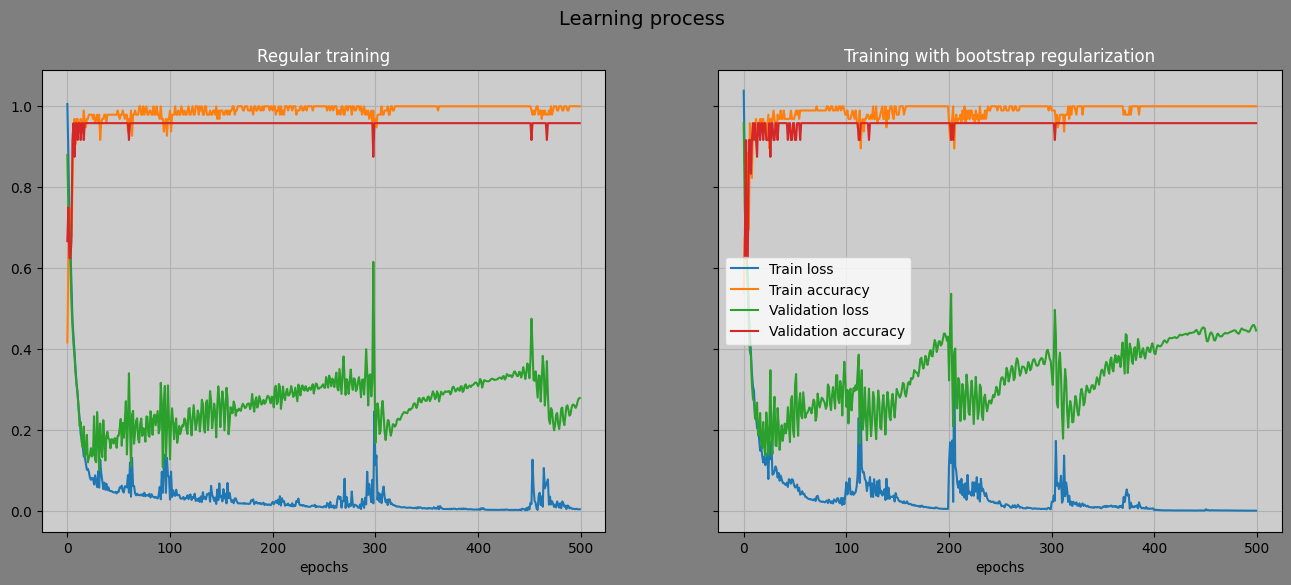

In [21]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()

In [22]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


1/1 [==============================] - 0s 27ms/step - loss: 0.0153 - accuracy: 1.0000


,Test accuracy,Test loss
,,
Regular training,1.000000,0.004582
Boostrap regularization,1.000000,0.015335


# Regression

## Experiment 5
### Sklearn diabetes dataset

In [23]:
data = load_diabetes()
X = data['data']
y = data['target']

x_train_valid, x_test, y_train_valid, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RS)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=VALIDATION_SPLIT, random_state=RS)

x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]


In [24]:
model_1 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_1.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

# Train first model

history_1 = model_1.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_valid, y_valid))

Epoch 1/500
5/5 [==============================] - 2s 70ms/step - loss: 28590.2793 - mean_absolute_error: 149.7181 - val_loss: 33961.7930 - val_mean_absolute_error: 169.0777
Epoch 2/500
5/5 [==============================] - 0s 18ms/step - loss: 28323.7363 - mean_absolute_error: 148.8487 - val_loss: 32984.6641 - val_mean_absolute_error: 166.2207
Epoch 3/500
5/5 [==============================] - 0s 22ms/step - loss: 26487.5977 - mean_absolute_error: 142.6676 - val_loss: 27025.5156 - val_mean_absolute_error: 147.6898
Epoch 4/500
5/5 [==============================] - 0s 20ms/step - loss: 17487.7168 - mean_absolute_error: 106.8144 - val_loss: 6705.9727 - val_mean_absolute_error: 67.8046
Epoch 5/500
5/5 [==============================] - 0s 24ms/step - loss: 8155.8467 - mean_absolute_error: 75.6515 - val_loss: 4051.3469 - val_mean_absolute_error: 53.2920
Epoch 6/500
5/5 [==============================] - 0s 23ms/step - loss: 5250.3604 - mean_absolute_error: 59.4179 - val_loss: 7846.7949 -

In [25]:
model_2 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_2.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

df = pd.DataFrame(columns=['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

for i in range(BOOTSTRAP_SAMPLES):

    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)

Epoch 1/50
5/5 [==============================] - 2s 59ms/step - loss: 28278.9062 - mean_absolute_error: 148.7580 - val_loss: 33903.7969 - val_mean_absolute_error: 168.9026
Epoch 2/50
5/5 [==============================] - 0s 23ms/step - loss: 27902.3184 - mean_absolute_error: 147.4549 - val_loss: 32429.2676 - val_mean_absolute_error: 164.5055
Epoch 3/50
5/5 [==============================] - 0s 21ms/step - loss: 25191.9746 - mean_absolute_error: 137.9292 - val_loss: 23935.8379 - val_mean_absolute_error: 136.5289
Epoch 4/50
5/5 [==============================] - 0s 21ms/step - loss: 13458.1572 - mean_absolute_error: 90.2846 - val_loss: 5058.6313 - val_mean_absolute_error: 59.0700
Epoch 5/50
5/5 [==============================] - 0s 21ms/step - loss: 9037.6279 - mean_absolute_error: 80.6210 - val_loss: 4445.1284 - val_mean_absolute_error: 56.0417
Epoch 6/50
5/5 [==============================] - 0s 20ms/step - loss: 5485.3638 - mean_absolute_error: 60.6483 - val_loss: 7842.6899 - val_me

<ipython-input-25-2acd5581792e>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 21ms/step - loss: 2784.7783 - mean_absolute_error: 40.4460 - val_loss: 3686.2922 - val_mean_absolute_error: 50.7042
Epoch 3/50
5/5 [==============================] - 0s 17ms/step - loss: 2673.3091 - mean_absolute_error: 39.9340 - val_loss: 3397.8545 - val_mean_absolute_error: 49.0420
Epoch 4/50
5/5 [==============================] - 0s 21ms/step - loss: 2588.4939 - mean_absolute_error: 39.6697 - val_loss: 3385.6775 - val_mean_absolute_error: 49.1240
Epoch 5/50
5/5 [==============================] - 0s 21ms/step - loss: 2535.9202 - mean_absolute_error: 39.6126 - val_loss: 3387.4211 - val_mean_absolute_error: 49.2122
Epoch 6/50
5/5 [==============================] - 0s 21ms/step - loss: 2456.7549 - mean_absolute_error: 38.7120 - val_loss: 3363.1453 - val_mean_absolute_error: 49.0523
Epoch 7/50
5/5 [==============================] - 0s 21ms/step - loss: 2397.7878 - mean_absolute_error: 38.1286 - val_loss: 3253.4624 - val_mean_absolute_error: 48.11

<ipython-input-25-2acd5581792e>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 21ms/step - loss: 2091.3049 - mean_absolute_error: 32.6758 - val_loss: 4207.0474 - val_mean_absolute_error: 51.9283
Epoch 3/50
5/5 [==============================] - 0s 21ms/step - loss: 1813.5247 - mean_absolute_error: 31.3844 - val_loss: 3959.5898 - val_mean_absolute_error: 49.8114
Epoch 4/50
5/5 [==============================] - 0s 20ms/step - loss: 1689.2573 - mean_absolute_error: 31.2756 - val_loss: 4153.1172 - val_mean_absolute_error: 50.6021
Epoch 5/50
5/5 [==============================] - 0s 20ms/step - loss: 1604.0291 - mean_absolute_error: 30.0713 - val_loss: 3959.8235 - val_mean_absolute_error: 49.9203
Epoch 6/50
5/5 [==============================] - 0s 20ms/step - loss: 1472.5610 - mean_absolute_error: 29.0136 - val_loss: 4044.8420 - val_mean_absolute_error: 51.0334
Epoch 7/50
5/5 [==============================] - 0s 17ms/step - loss: 1545.3226 - mean_absolute_error: 29.7795 - val_loss: 4025.5889 - val_mean_absolute_error: 50.67

<ipython-input-25-2acd5581792e>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 2/50
5/5 [==============================] - 0s 18ms/step - loss: 1235.7986 - mean_absolute_error: 24.1554 - val_loss: 6479.2930 - val_mean_absolute_error: 66.2042
Epoch 3/50
5/5 [==============================] - 0s 21ms/step - loss: 1165.4180 - mean_absolute_error: 25.1930 - val_loss: 5805.3428 - val_mean_absolute_error: 62.3471
Epoch 4/50
5/5 [==============================] - 0s 21ms/step - loss: 1176.6903 - mean_absolute_error: 25.4419 - val_loss: 5087.6348 - val_mean_absolute_error: 58.4194
Epoch 5/50
5/5 [==============================] - 0s 17ms/step - loss: 833.5684 - mean_absolute_error: 21.0178 - val_loss: 4660.5981 - val_mean_absolute_error: 54.6635
Epoch 6/50
5/5 [==============================] - 0s 21ms/step - loss: 711.9731 - mean_absolute_error: 19.1037 - val_loss: 4860.6045 - val_mean_absolute_error: 57.1881
Epoch 7/50
5/5 [==============================] - 0s 21ms/step - loss: 628.6177 - mean_absolute_error: 17.0050 - val_loss: 5341.9712 - val_mean_absolute_erro

<ipython-input-25-2acd5581792e>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 33ms/step - loss: 849.4417 - mean_absolute_error: 16.1061 - val_loss: 5525.1353 - val_mean_absolute_error: 62.1942
Epoch 2/50
5/5 [==============================] - 0s 20ms/step - loss: 660.4651 - mean_absolute_error: 16.6236 - val_loss: 5632.3779 - val_mean_absolute_error: 62.7361
Epoch 3/50
5/5 [==============================] - 0s 19ms/step - loss: 518.0858 - mean_absolute_error: 15.8895 - val_loss: 5167.5039 - val_mean_absolute_error: 59.6641
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 388.2871 - mean_absolute_error: 13.9081 - val_loss: 4965.0425 - val_mean_absolute_error: 58.2512
Epoch 5/50
5/5 [==============================] - 0s 17ms/step - loss: 322.9137 - mean_absolute_error: 12.9441 - val_loss: 5018.0601 - val_mean_absolute_error: 58.0234
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 280.5559 - mean_absolute_error: 12.0458 - val_loss: 4942.7617 - val_mean_absolute_error: 57.5225
Epo

<ipython-input-25-2acd5581792e>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 19ms/step - loss: 394.3203 - mean_absolute_error: 13.6760 - val_loss: 5194.2075 - val_mean_absolute_error: 59.8576
Epoch 3/50
5/5 [==============================] - 0s 19ms/step - loss: 370.2901 - mean_absolute_error: 14.8273 - val_loss: 5064.1377 - val_mean_absolute_error: 59.2055
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 293.7721 - mean_absolute_error: 13.3389 - val_loss: 5102.8389 - val_mean_absolute_error: 59.9068
Epoch 5/50
5/5 [==============================] - 0s 16ms/step - loss: 229.6581 - mean_absolute_error: 11.6201 - val_loss: 5765.8130 - val_mean_absolute_error: 64.1678
Epoch 6/50
5/5 [==============================] - 0s 18ms/step - loss: 244.2633 - mean_absolute_error: 11.8324 - val_loss: 5191.5439 - val_mean_absolute_error: 60.5511
Epoch 7/50
5/5 [==============================] - 0s 22ms/step - loss: 221.6595 - mean_absolute_error: 11.8080 - val_loss: 5183.6763 - val_mean_absolute_error: 60.0682
Epo

<ipython-input-25-2acd5581792e>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 22ms/step - loss: 224.6863 - mean_absolute_error: 10.9754 - val_loss: 5412.3149 - val_mean_absolute_error: 61.1977
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 185.2181 - mean_absolute_error: 10.1792 - val_loss: 5177.8145 - val_mean_absolute_error: 59.6533
Epoch 4/50
5/5 [==============================] - 0s 23ms/step - loss: 150.6886 - mean_absolute_error: 9.3782 - val_loss: 5722.5034 - val_mean_absolute_error: 63.0431
Epoch 5/50
5/5 [==============================] - 0s 18ms/step - loss: 148.1705 - mean_absolute_error: 9.3599 - val_loss: 5095.2275 - val_mean_absolute_error: 58.2910
Epoch 6/50
5/5 [==============================] - 0s 21ms/step - loss: 123.2215 - mean_absolute_error: 8.7251 - val_loss: 5029.6631 - val_mean_absolute_error: 58.6313
Epoch 7/50
5/5 [==============================] - 0s 18ms/step - loss: 116.3390 - mean_absolute_error: 8.3309 - val_loss: 5529.1406 - val_mean_absolute_error: 61.6068
Epoch 8

<ipython-input-25-2acd5581792e>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 44ms/step - loss: 309.9888 - mean_absolute_error: 10.2571 - val_loss: 5008.7031 - val_mean_absolute_error: 58.7164
Epoch 2/50
5/5 [==============================] - 0s 29ms/step - loss: 246.0807 - mean_absolute_error: 10.4512 - val_loss: 5217.3135 - val_mean_absolute_error: 60.2299
Epoch 3/50
5/5 [==============================] - 0s 30ms/step - loss: 242.5139 - mean_absolute_error: 11.7365 - val_loss: 5283.3594 - val_mean_absolute_error: 60.2899
Epoch 4/50
5/5 [==============================] - 0s 26ms/step - loss: 178.1404 - mean_absolute_error: 9.9435 - val_loss: 4832.6313 - val_mean_absolute_error: 56.1910
Epoch 5/50
5/5 [==============================] - 0s 31ms/step - loss: 206.6031 - mean_absolute_error: 11.2276 - val_loss: 4995.9077 - val_mean_absolute_error: 57.5394
Epoch 6/50
5/5 [==============================] - 0s 29ms/step - loss: 173.6178 - mean_absolute_error: 9.7344 - val_loss: 4857.1294 - val_mean_absolute_error: 57.2548
Epoch

<ipython-input-25-2acd5581792e>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 37ms/step - loss: 321.4897 - mean_absolute_error: 10.0663 - val_loss: 5210.3330 - val_mean_absolute_error: 59.7860
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 162.9860 - mean_absolute_error: 8.2908 - val_loss: 5420.2031 - val_mean_absolute_error: 60.6080
Epoch 3/50
5/5 [==============================] - 0s 17ms/step - loss: 138.4187 - mean_absolute_error: 8.6584 - val_loss: 5059.7412 - val_mean_absolute_error: 57.9678
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 92.1107 - mean_absolute_error: 7.2066 - val_loss: 5194.4180 - val_mean_absolute_error: 59.3761
Epoch 5/50
5/5 [==============================] - 0s 17ms/step - loss: 118.5151 - mean_absolute_error: 8.3955 - val_loss: 5354.4736 - val_mean_absolute_error: 60.3326
Epoch 6/50
5/5 [==============================] - 0s 20ms/step - loss: 69.9320 - mean_absolute_error: 6.3113 - val_loss: 5167.1211 - val_mean_absolute_error: 59.1634
Epoch 7/50

<ipython-input-25-2acd5581792e>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 29ms/step - loss: 112.2326 - mean_absolute_error: 6.1509 - val_loss: 5288.7695 - val_mean_absolute_error: 60.2430
Epoch 2/50
5/5 [==============================] - 0s 23ms/step - loss: 92.9102 - mean_absolute_error: 7.4232 - val_loss: 5042.3574 - val_mean_absolute_error: 58.6960
Epoch 3/50
5/5 [==============================] - 0s 22ms/step - loss: 118.6981 - mean_absolute_error: 8.4996 - val_loss: 5471.1987 - val_mean_absolute_error: 60.8772
Epoch 4/50
5/5 [==============================] - 0s 21ms/step - loss: 94.8743 - mean_absolute_error: 7.7044 - val_loss: 5434.8652 - val_mean_absolute_error: 60.5935
Epoch 5/50
5/5 [==============================] - 0s 21ms/step - loss: 116.3981 - mean_absolute_error: 8.2644 - val_loss: 5088.8848 - val_mean_absolute_error: 58.1785
Epoch 6/50
5/5 [==============================] - 0s 21ms/step - loss: 145.2779 - mean_absolute_error: 9.5418 - val_loss: 4907.7949 - val_mean_absolute_error: 57.6646
Epoch 7/50


<ipython-input-25-2acd5581792e>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


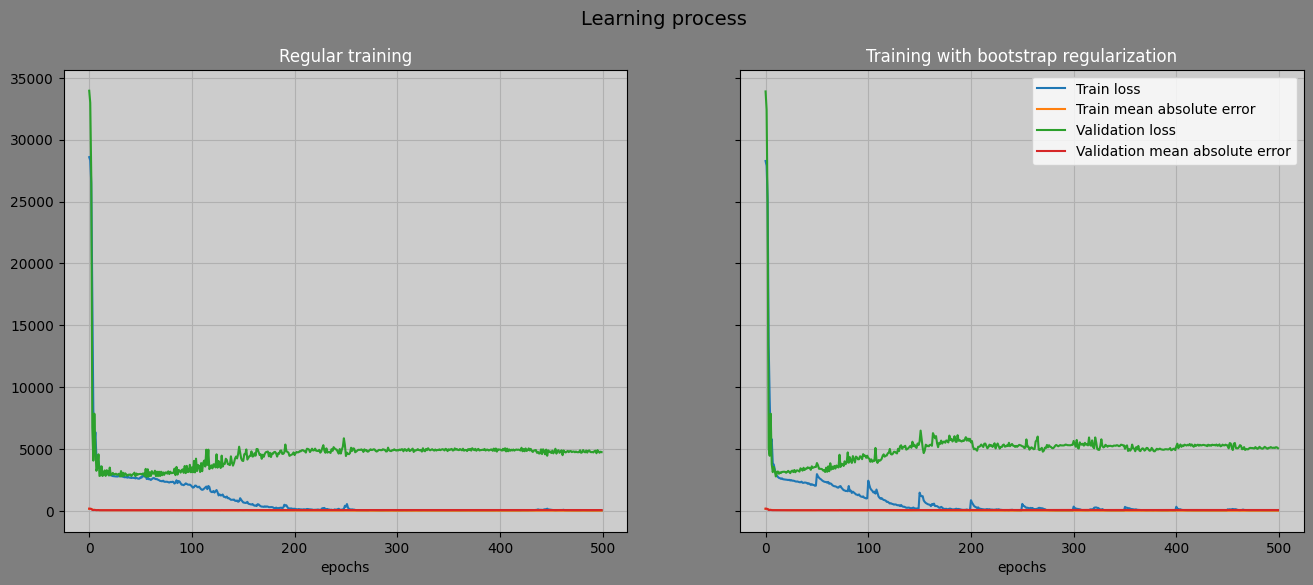

In [26]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train mean absolute error', 'Validation loss', 'Validation mean absolute error'], loc='best')
plt.show()

In [27]:
loss_1, mae_1 = model_1.evaluate(x_test, y_test)
loss_2, mae_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test mean absolute error': [mae_1, mae_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


3/3 [==============================] - 0s 5ms/step - loss: 5019.6504 - mean_absolute_error: 54.0074


,Test mean absolute error,Test loss
,,
Regular training,54.919399,5280.158691
Boostrap regularization,54.007359,5019.650391


## Experiment 6
### Slearn california house price dataset

In [28]:
data = fetch_california_housing()

y = data['target']
X = data['data']

x_train_valid, x_test, y_train_valid, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RS)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=VALIDATION_SPLIT, random_state=RS)


x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [29]:
model_1 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_1.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

history_1 = model_1.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_valid, y_valid))

Epoch 1/500
207/207 [==============================] - 4s 12ms/step - loss: 137.1845 - mean_absolute_error: 2.6145 - val_loss: 1.3306 - val_mean_absolute_error: 0.9034
Epoch 2/500
207/207 [==============================] - 2s 11ms/step - loss: 1.9896 - mean_absolute_error: 1.0447 - val_loss: 1.4851 - val_mean_absolute_error: 1.0222
Epoch 3/500
207/207 [==============================] - 5s 25ms/step - loss: 1.5885 - mean_absolute_error: 0.9795 - val_loss: 1.4784 - val_mean_absolute_error: 1.0073
Epoch 4/500
207/207 [==============================] - 5s 22ms/step - loss: 1.4004 - mean_absolute_error: 0.9227 - val_loss: 1.4033 - val_mean_absolute_error: 0.8794
Epoch 5/500
207/207 [==============================] - 5s 22ms/step - loss: 1.6552 - mean_absolute_error: 0.9486 - val_loss: 0.9602 - val_mean_absolute_error: 0.8189
Epoch 6/500
207/207 [==============================] - 6s 28ms/step - loss: 0.8129 - mean_absolute_error: 0.6925 - val_loss: 0.9646 - val_mean_absolute_error: 0.6983
Ep

In [31]:
model_2 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_2.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

df = pd.DataFrame(columns=['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)

Epoch 1/50
207/207 [==============================] - 9s 27ms/step - loss: 71.5332 - mean_absolute_error: 2.7806 - val_loss: 1.4226 - val_mean_absolute_error: 0.9625
Epoch 2/50
207/207 [==============================] - 6s 27ms/step - loss: 2.2896 - mean_absolute_error: 1.1413 - val_loss: 1.6845 - val_mean_absolute_error: 1.0901
Epoch 3/50
207/207 [==============================] - 2s 11ms/step - loss: 1.3456 - mean_absolute_error: 0.9171 - val_loss: 1.3925 - val_mean_absolute_error: 0.9775
Epoch 4/50
207/207 [==============================] - 2s 10ms/step - loss: 1.3127 - mean_absolute_error: 0.9058 - val_loss: 1.1526 - val_mean_absolute_error: 0.8286
Epoch 5/50
207/207 [==============================] - 2s 10ms/step - loss: 1.0184 - mean_absolute_error: 0.7886 - val_loss: 0.7787 - val_mean_absolute_error: 0.6459
Epoch 6/50
207/207 [==============================] - 3s 17ms/step - loss: 0.9774 - mean_absolute_error: 0.7414 - val_loss: 1.0991 - val_mean_absolute_error: 0.8507
Epoch 7/5

<ipython-input-31-4b6c81e79ac9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 3s 13ms/step - loss: 0.5223 - mean_absolute_error: 0.5319 - val_loss: 0.5468 - val_mean_absolute_error: 0.5243
Epoch 2/50
207/207 [==============================] - 4s 21ms/step - loss: 0.5379 - mean_absolute_error: 0.5463 - val_loss: 0.6142 - val_mean_absolute_error: 0.5532
Epoch 3/50
207/207 [==============================] - 4s 17ms/step - loss: 0.5328 - mean_absolute_error: 0.5404 - val_loss: 0.5177 - val_mean_absolute_error: 0.5201
Epoch 4/50
207/207 [==============================] - 2s 11ms/step - loss: 0.5351 - mean_absolute_error: 0.5432 - val_loss: 0.5225 - val_mean_absolute_error: 0.5288
Epoch 5/50
207/207 [==============================] - 2s 10ms/step - loss: 0.5137 - mean_absolute_error: 0.5286 - val_loss: 0.5051 - val_mean_absolute_error: 0.5132
Epoch 6/50
207/207 [==============================] - 2s 11ms/step - loss: 0.5121 - mean_absolute_error: 0.5269 - val_loss: 0.5741 - val_mean_absolute_error: 0.5746
Epoch 7/50
207/207 [=

<ipython-input-31-4b6c81e79ac9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 2s 10ms/step - loss: 0.4686 - mean_absolute_error: 0.5097 - val_loss: 0.4889 - val_mean_absolute_error: 0.5163
Epoch 2/50
207/207 [==============================] - 2s 11ms/step - loss: 0.4457 - mean_absolute_error: 0.4955 - val_loss: 0.4889 - val_mean_absolute_error: 0.5155
Epoch 3/50
207/207 [==============================] - 3s 16ms/step - loss: 0.4451 - mean_absolute_error: 0.4949 - val_loss: 0.4900 - val_mean_absolute_error: 0.5211
Epoch 4/50
207/207 [==============================] - 3s 15ms/step - loss: 0.4570 - mean_absolute_error: 0.5046 - val_loss: 0.5934 - val_mean_absolute_error: 0.5468
Epoch 5/50
207/207 [==============================] - 2s 11ms/step - loss: 0.4710 - mean_absolute_error: 0.5109 - val_loss: 0.4922 - val_mean_absolute_error: 0.5150
Epoch 6/50
207/207 [==============================] - 2s 11ms/step - loss: 0.4589 - mean_absolute_error: 0.5025 - val_loss: 0.5614 - val_mean_absolute_error: 0.5357
Epoch 7/50
207/207 [=

<ipython-input-31-4b6c81e79ac9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 2s 11ms/step - loss: 0.4284 - mean_absolute_error: 0.4776 - val_loss: 0.4827 - val_mean_absolute_error: 0.4982
Epoch 2/50
207/207 [==============================] - 3s 16ms/step - loss: 0.4186 - mean_absolute_error: 0.4724 - val_loss: 0.4749 - val_mean_absolute_error: 0.5028
Epoch 3/50
207/207 [==============================] - 3s 14ms/step - loss: 0.4197 - mean_absolute_error: 0.4754 - val_loss: 0.4687 - val_mean_absolute_error: 0.5044
Epoch 4/50
207/207 [==============================] - 2s 11ms/step - loss: 0.4285 - mean_absolute_error: 0.4808 - val_loss: 0.4690 - val_mean_absolute_error: 0.4882
Epoch 5/50
207/207 [==============================] - 2s 12ms/step - loss: 0.4057 - mean_absolute_error: 0.4639 - val_loss: 0.5044 - val_mean_absolute_error: 0.5049
Epoch 6/50
207/207 [==============================] - 2s 11ms/step - loss: 0.4150 - mean_absolute_error: 0.4716 - val_loss: 0.4984 - val_mean_absolute_error: 0.4945
Epoch 7/50
207/207 [=

<ipython-input-31-4b6c81e79ac9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 2s 11ms/step - loss: 0.4071 - mean_absolute_error: 0.4597 - val_loss: 0.4887 - val_mean_absolute_error: 0.4896
Epoch 2/50
207/207 [==============================] - 4s 18ms/step - loss: 0.3981 - mean_absolute_error: 0.4584 - val_loss: 0.5055 - val_mean_absolute_error: 0.4952
Epoch 3/50
207/207 [==============================] - 2s 12ms/step - loss: 0.3979 - mean_absolute_error: 0.4551 - val_loss: 0.5108 - val_mean_absolute_error: 0.5007
Epoch 4/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3862 - mean_absolute_error: 0.4498 - val_loss: 0.4750 - val_mean_absolute_error: 0.4873
Epoch 5/50
207/207 [==============================] - 2s 10ms/step - loss: 0.3913 - mean_absolute_error: 0.4561 - val_loss: 0.4590 - val_mean_absolute_error: 0.4844
Epoch 6/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3827 - mean_absolute_error: 0.4479 - val_loss: 0.4684 - val_mean_absolute_error: 0.5051
Epoch 7/50
207/207 [=

<ipython-input-31-4b6c81e79ac9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 4s 17ms/step - loss: 0.3754 - mean_absolute_error: 0.4421 - val_loss: 0.4756 - val_mean_absolute_error: 0.4795
Epoch 2/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3868 - mean_absolute_error: 0.4524 - val_loss: 0.4809 - val_mean_absolute_error: 0.4988
Epoch 3/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3657 - mean_absolute_error: 0.4392 - val_loss: 0.4686 - val_mean_absolute_error: 0.4909
Epoch 4/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3818 - mean_absolute_error: 0.4493 - val_loss: 0.4586 - val_mean_absolute_error: 0.4880
Epoch 5/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3588 - mean_absolute_error: 0.4341 - val_loss: 0.4505 - val_mean_absolute_error: 0.4821
Epoch 6/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3602 - mean_absolute_error: 0.4355 - val_loss: 0.4645 - val_mean_absolute_error: 0.4861
Epoch 7/50
207/207 [=

<ipython-input-31-4b6c81e79ac9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 4s 19ms/step - loss: 0.3743 - mean_absolute_error: 0.4443 - val_loss: 0.4523 - val_mean_absolute_error: 0.4828
Epoch 2/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3753 - mean_absolute_error: 0.4444 - val_loss: 0.4558 - val_mean_absolute_error: 0.4765
Epoch 3/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3598 - mean_absolute_error: 0.4360 - val_loss: 0.4593 - val_mean_absolute_error: 0.4829
Epoch 4/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3469 - mean_absolute_error: 0.4235 - val_loss: 0.5213 - val_mean_absolute_error: 0.5329
Epoch 5/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3576 - mean_absolute_error: 0.4340 - val_loss: 0.4872 - val_mean_absolute_error: 0.5015
Epoch 6/50
207/207 [==============================] - 3s 16ms/step - loss: 0.3445 - mean_absolute_error: 0.4251 - val_loss: 0.4745 - val_mean_absolute_error: 0.4968
Epoch 7/50
207/207 [=

<ipython-input-31-4b6c81e79ac9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 4s 19ms/step - loss: 0.3781 - mean_absolute_error: 0.4410 - val_loss: 0.4792 - val_mean_absolute_error: 0.4845
Epoch 2/50
207/207 [==============================] - 2s 12ms/step - loss: 0.5063 - mean_absolute_error: 0.4571 - val_loss: 0.4426 - val_mean_absolute_error: 0.4722
Epoch 3/50
207/207 [==============================] - 2s 12ms/step - loss: 0.3777 - mean_absolute_error: 0.4422 - val_loss: 0.4417 - val_mean_absolute_error: 0.4685
Epoch 4/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3651 - mean_absolute_error: 0.4343 - val_loss: 0.4400 - val_mean_absolute_error: 0.4676
Epoch 5/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3599 - mean_absolute_error: 0.4302 - val_loss: 0.4665 - val_mean_absolute_error: 0.4769
Epoch 6/50
207/207 [==============================] - 3s 16ms/step - loss: 0.3497 - mean_absolute_error: 0.4225 - val_loss: 0.4658 - val_mean_absolute_error: 0.4943
Epoch 7/50
207/207 [=

<ipython-input-31-4b6c81e79ac9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 2s 12ms/step - loss: 0.4286 - mean_absolute_error: 0.4486 - val_loss: 0.4497 - val_mean_absolute_error: 0.4768
Epoch 2/50
207/207 [==============================] - 4s 19ms/step - loss: 0.3483 - mean_absolute_error: 0.4247 - val_loss: 0.5010 - val_mean_absolute_error: 0.4805
Epoch 3/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3380 - mean_absolute_error: 0.4193 - val_loss: 0.5912 - val_mean_absolute_error: 0.5188
Epoch 4/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3486 - mean_absolute_error: 0.4258 - val_loss: 0.4546 - val_mean_absolute_error: 0.4708
Epoch 5/50
207/207 [==============================] - 2s 10ms/step - loss: 0.3185 - mean_absolute_error: 0.4054 - val_loss: 0.4613 - val_mean_absolute_error: 0.4960
Epoch 6/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3126 - mean_absolute_error: 0.4002 - val_loss: 0.4608 - val_mean_absolute_error: 0.4836
Epoch 7/50
207/207 [=

<ipython-input-31-4b6c81e79ac9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 2s 11ms/step - loss: 0.3454 - mean_absolute_error: 0.4211 - val_loss: 0.5014 - val_mean_absolute_error: 0.5033
Epoch 2/50
207/207 [==============================] - 3s 15ms/step - loss: 0.3294 - mean_absolute_error: 0.4106 - val_loss: 0.4635 - val_mean_absolute_error: 0.4849
Epoch 3/50
207/207 [==============================] - 3s 15ms/step - loss: 0.3141 - mean_absolute_error: 0.4013 - val_loss: 0.5170 - val_mean_absolute_error: 0.5286
Epoch 4/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3184 - mean_absolute_error: 0.4049 - val_loss: 0.4801 - val_mean_absolute_error: 0.4935
Epoch 5/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3381 - mean_absolute_error: 0.4158 - val_loss: 0.4633 - val_mean_absolute_error: 0.4779
Epoch 6/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3005 - mean_absolute_error: 0.3922 - val_loss: 0.4680 - val_mean_absolute_error: 0.4808
Epoch 7/50
207/207 [=

<ipython-input-31-4b6c81e79ac9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


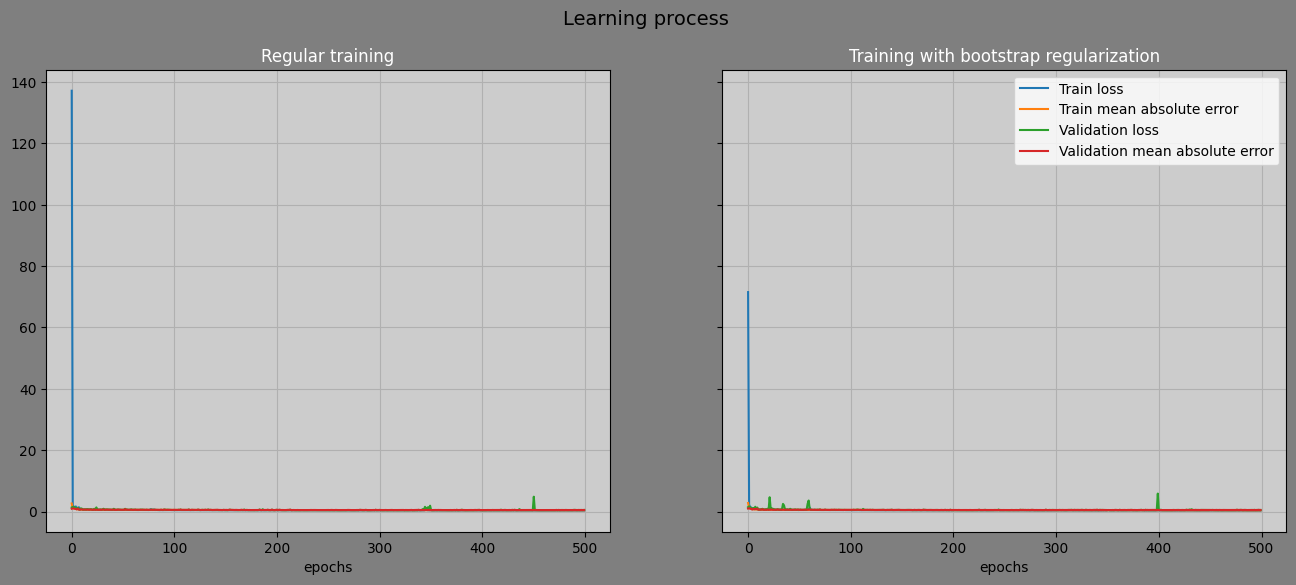

In [32]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train mean absolute error', 'Validation loss', 'Validation mean absolute error'], loc='best')
plt.show()

In [33]:
loss_1, mae_1 = model_1.evaluate(x_test, y_test)
loss_2, mae_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test mean absolute error': [mae_1, mae_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


129/129 [==============================] - 0s 3ms/step - loss: 0.4893 - mean_absolute_error: 0.5010


,Test mean absolute error,Test loss
,,
Regular training,0.481696,0.486044
Boostrap regularization,0.501038,0.489284
